In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis del dataset de AIRBNB 

In [2]:
df1 = pd.read_excel("Airbnb_NYC.xlsx", sheet_name = "NYC1")
df2 = pd.read_excel("Airbnb_NYC.xlsx", sheet_name = "NYC2")
df = pd.merge(df1,df2,right_on="id", left_on="id")
df

,id,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,NaT,NaN,2.0,9.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,NaT,NaN,2.0,36.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,NaT,NaN,1.0,27.0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1.0,0.0,NaT,NaN,6.0,2.0


### Graficar por municipio el número de habitaciones de cada tipo

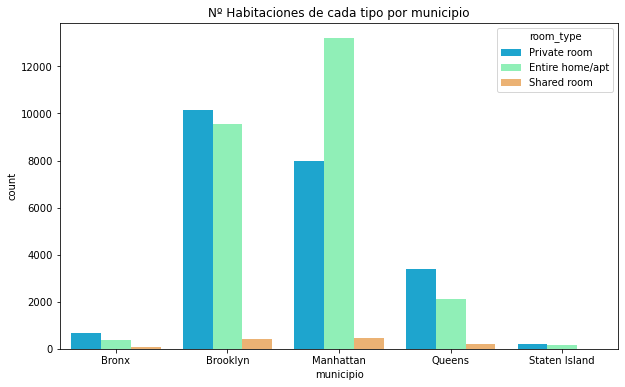

In [3]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="municipio", hue="room_type", data=df, palette="rainbow",order=["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]) 
plt.title('Nº Habitaciones de cada tipo por municipio')
plt.show()

### Graficar por municipio el número de reviews

In [4]:
bronx=df.query("municipio == 'Bronx'")["number_of_reviews"].sum()
manhatt=df.query("municipio == 'Manhttan'")["number_of_reviews"].sum()
queens=df.query("municipio == 'Queens'")["number_of_reviews"].sum()
brook=df.query("municipio == 'Brooklyn'")["number_of_reviews"].sum()
st=df.query("municipio == 'Staten Island'")["number_of_reviews"].sum()

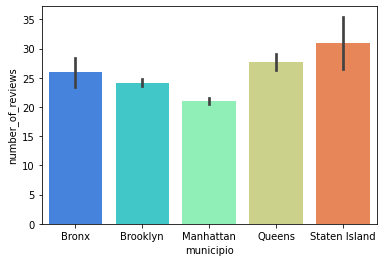

In [5]:
sns.barplot(x="municipio", y="number_of_reviews", data=df, order=["Bronx","Brooklyn","Manhattan","Queens","Staten Island"],palette="rainbow") 
plt.show()

### Graficar el número de habitaciones individuales, casa/ dep completo y compartido de cada municipio.

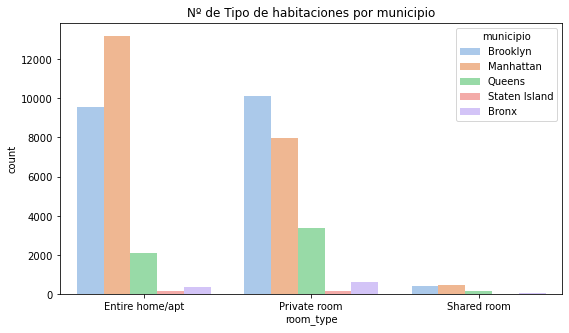

In [6]:
fig, ax = plt.subplots(figsize=(9,5))
sns.countplot(x="room_type", hue="municipio", data=df, palette="pastel",order=["Entire home/apt","Private room","Shared room"]) 
plt.title('Nº de Tipo de habitaciones por municipio')
plt.show()

### Graficar la cantidad de reviews de cada municipio de acuerdo a tipo de habitación

In [7]:
vbronx=df.query("municipio == 'Bronx' & room_type=='Private room'")["number_of_reviews"]
vbrook=df.query("municipio == 'Brooklyn' & room_type=='Entire home/apt'")["number_of_reviews"]
vmanhattan=df.query("municipio == 'Manhattan' & room_type=='Entire home/apt'")["number_of_reviews"]

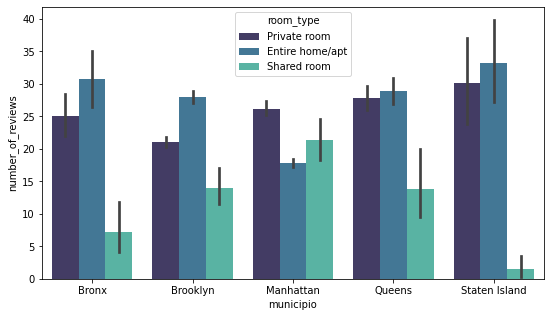

In [8]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(x="municipio", y="number_of_reviews",hue="room_type" ,data=df, order=["Bronx","Brooklyn","Manhattan","Queens","Staten Island"],palette="mako") 
plt.show()

### Graficar en un diagrama de caja el precio por habitación de cada municipio

In [9]:
tipo1=df.query("municipio=='Brooklyn'")["price"]
tipo2=df.query("municipio=='Manhattan'")["price"]
tipo3=df.query("municipio=='Queens'")["price"]
tipo4=df.query("municipio=='Staten Island'")["price"]
tipo5=df.query("municipio=='Bronx'")["price"]

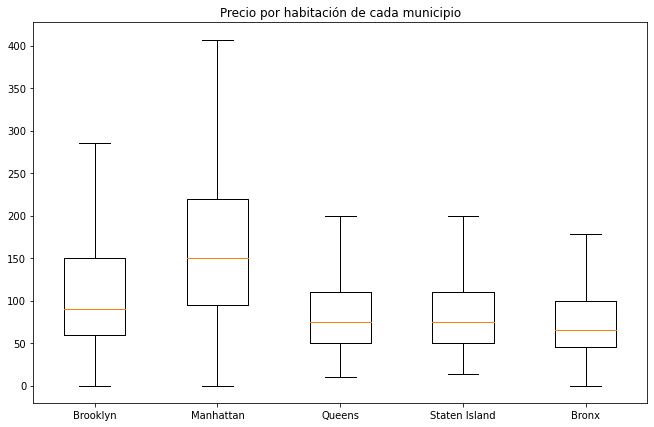

In [10]:
all_data = [tipo1,tipo2,tipo3,tipo4,tipo5]
labels = ['Brooklyn', 'Manhattan', 'Queens','Staten Island','Bronx']

fig, ax = plt.subplots(figsize=(11,7))

ax.boxplot(all_data, labels=labels, showfliers=False)
plt.title('Precio por habitación de cada municipio')
plt.show()

### Graficar el precio de los 10 barrios con el mayor precio por habitación individual.

In [11]:
barrio=df.query("room_type=='Private room'").sort_values("price").tail(10)

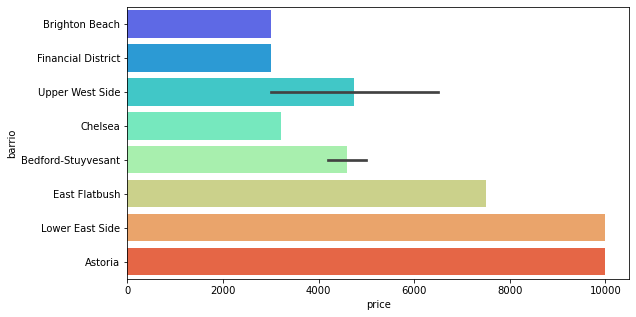

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(x="price", y="barrio", data=barrio,palette="rainbow")
plt.show()

### Graficar por municipio el top 5 de Airbnb con mayor rating 

In [13]:
tipo1=df.query("municipio=='Brooklyn'").sort_values("price").tail(5)
tipo2=df.query("municipio=='Manhattan'").sort_values("price").tail(5)
tipo3=df.query("municipio=='Queens'").sort_values("price").tail(5)
tipo4=df.query("municipio=='Staten Island'").sort_values("price").tail(5)
tipo5=df.query("municipio=='Bronx'").sort_values("price").tail(5)

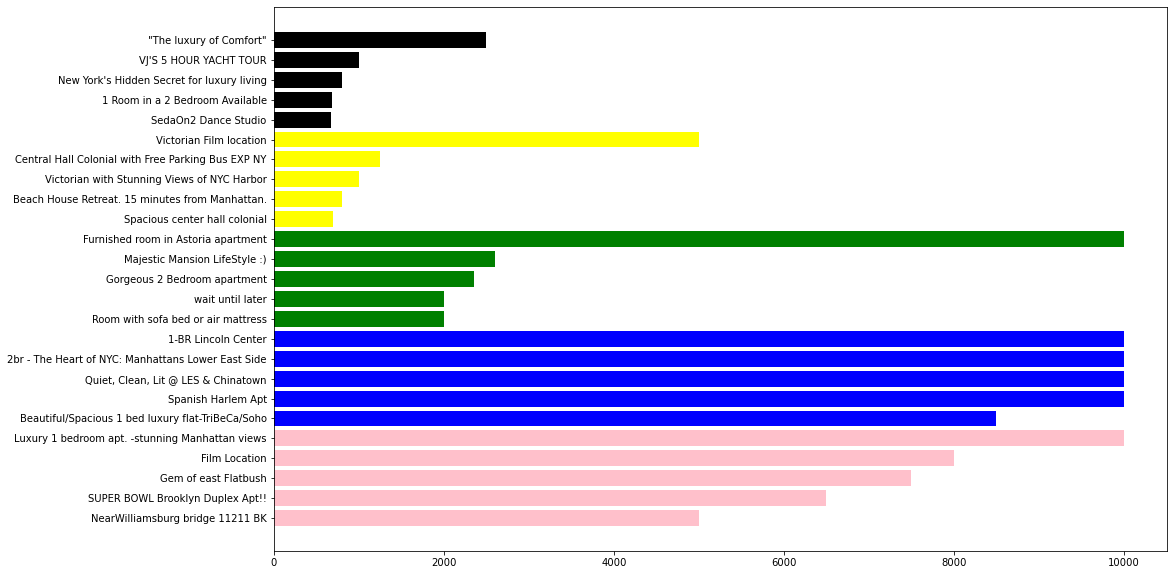

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
plt.barh(tipo1["name"], tipo1["price"], color="pink")
plt.barh(tipo2["name"], tipo2["price"], color="blue")
plt.barh(tipo3["name"], tipo3["price"], color="green")
plt.barh(tipo4["name"], tipo4["price"], color="yellow")
plt.barh(tipo5["name"], tipo5["price"], color="black")
plt.show()

### En una gráfica scatter muestra precio vs rating de los primeros 50 Airbnb


In [15]:
x = df["price"].head(50)

In [16]:
y = df["number_of_reviews"].head(50)

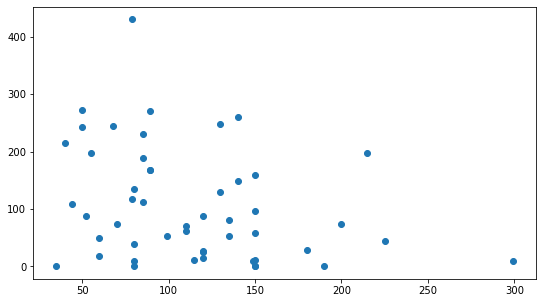

In [17]:
fig, ax = plt.subplots(figsize=(9,5))
plt.scatter(x,y)

plt.show()